# XRAY TRANSFORMER

The specs of the transformer are as follows:

Single Phase, High Frequency High Voltage Transformer

Primary Winding Voltage ± 417 V (peak to peak 834 V for pulsing) 

Secondary Winding Voltage ± 12.5 kV (peak to peak 25 kV for pulsing)

Rated Power 30 kW (for maximum 100 milisecond) 

Switching Frequency Minimum 100 kHz 

Ambient Temperature 0-40 °C 

In [179]:
Vprimary=417
Vsecondary=12500
Pout=30000
f=100000
Tmin=0
Tmax=0

Laminated steel would not be used for this type of application. Ferrite would normally be used for this type of application at the specified frequency. 

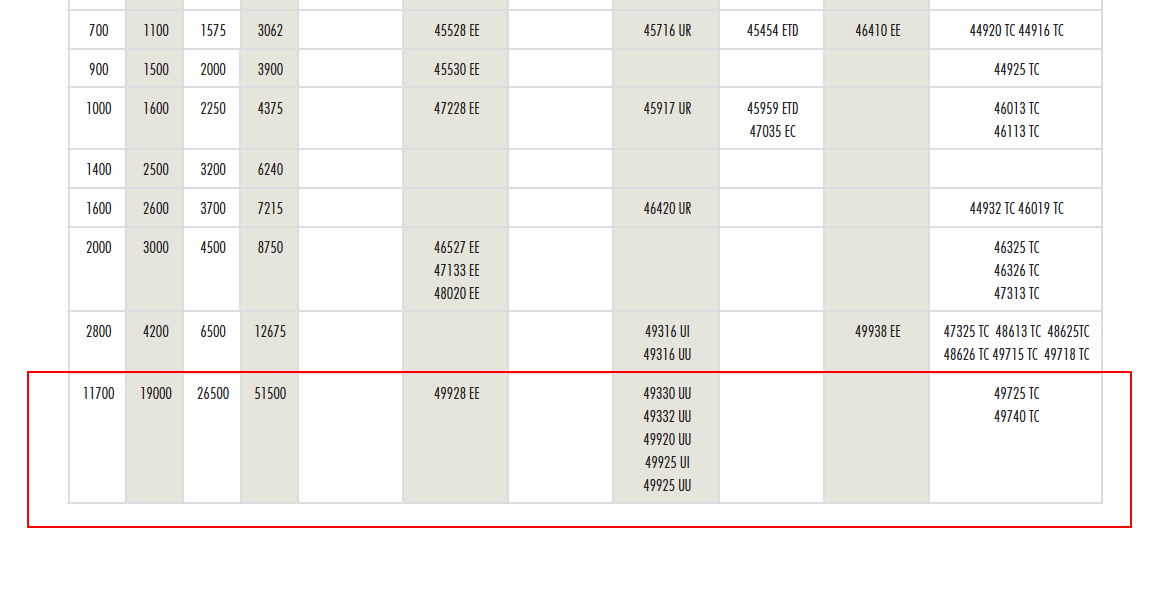

In [180]:
from IPython.display import Image
Image(filename='core.png', width=500, height=500)

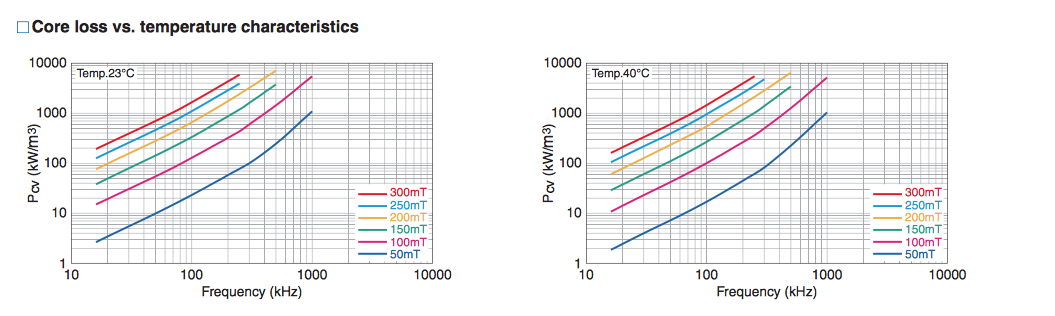

In [181]:
from IPython.display import Image
Image(filename='core_loss_temperature.png', width=500, height=500)

The core loss vs temperature charactheristics of the core is added.


In [182]:
import math
μ0=4*math.pi*1e-7
f=1e5
ρ=1.68e-8
#in cm
Skin_depth=0.0662/math.sqrt(f)*100

Dw=2*Skin_depth #Wire diameter

Aw=math.pi*Dw*Dw/4 # wire area in cm^2

print('Skin_depth=',round(Skin_depth, 4),'cm',"\n",'Dw=',round(Dw,4),'cm',"\n",'Aw=',round(Aw,4),'cm^2')


Skin_depth= 0.0209 cm 
 Dw= 0.0419 cm 
 Aw= 0.0014 cm^2


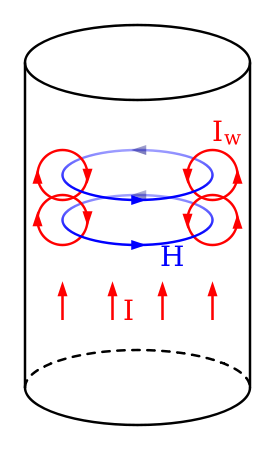

In [183]:
from IPython.display import Image
Image(filename='skindepthreason.png', width=200, height=200)

****Skin depth reason ile ilgili açıklama olacak 

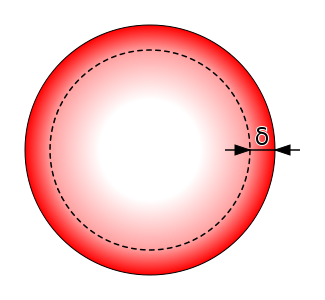

In [184]:
from IPython.display import Image
Image(filename='skindepth.png', width=200, height=200)


We have found that the skin depth was 0.0209 cm, as a result we have to choose conductor radius less that the skin depth no to be effected by this phenomena.

AWG 26 is the most convinient choice for our case.

In [185]:
R_conductor=0.0202 #in cm
D_conductor=0.0405 #in cm
Res_conductor =133.9 # mOhm/m

In [186]:
import math
Vprimary = 417;
Vprimary_peak = Vprimary*4/math.pi;
Vprimary_rms = Vprimary_peak/math.sqrt(2);
Vsecondary = 12500;
Vsecondary_peak = Vsecondary*4/math.pi;
Vsecondary_rms = Vsecondary_peak/math.sqrt(2);
Pout = 30000;
Iprimary_rms = Pout/Vprimary_rms;
Isecondary_rms = Pout/Vsecondary_rms;
print(' Vprimary=',round(Vprimary, 4),'V',"\n",'Vprimary_peak=',round(Vprimary_peak,4),'V',"\n",'Vprimary_rms=',round(Vprimary_rms,4),'V',"\n",'Vsecondary_peak=',round(Vsecondary_peak,4),'V',"\n",'Vsecondary_rms=',round(Vsecondary_rms,4),'V',"\n",'Iprimary_rms=',round(Iprimary_rms,4),'V',"\n",'Isecondary_rms=',round(Isecondary_rms,4),'V',"\n")



 Vprimary= 417 V 
 Vprimary_peak= 530.9409 V 
 Vprimary_rms= 375.4319 V 
 Vsecondary_peak= 15915.4943 V 
 Vsecondary_rms= 11253.954 V 
 Iprimary_rms= 79.908 V 
 Isecondary_rms= 2.6657 V 



Efficiency = 0.94 # This transformer will work for a very short time interval,as a result we dont have to aim such high efficiency percent such as the distribution transformer case. 



In [187]:
# Area product calculation
c =2.82e-3 # cm^2/Amps
efficiency =0.95 
f=100000
Pout=30000
Pinput=Pout/efficiency
Bm=0.4
Kf=4
K = 0.7
area_product = Pinput*c*1e4/(4*efficiency*Bm*f)
print(' Pinput=',round(Pinput, 4),'W',"\n",'area_product=',round(area_product,4),'cm^2')



 Pinput= 31578.9474 W 
 area_product= 5.8587 cm^2


In [188]:
Ac=1.52*1.52 #cm^2
Nprimary=(Vprimary*1e4)/(Ac*Bm*f*Kf) 
Nprimary=math.ceil(Nprimary)
print('Nprimary=',Nprimary,'turns')

Nprimary= 12 turns


In [189]:
Nsecondary=Nprimary*Vsecondary/Vprimary*(1+0.5/100) 
Nsecondary=math.ceil(Nsecondary)
print('Nsecondary=',Nsecondary,'turns')

Nsecondary= 362 turns


In [190]:
J=(2*30000*1e4)/(Kf*K*Bm*f*area_product) # A/cm^2
print('J=',round(J,4),'A/cm^2')

J= 914.387 A/cm^2


In [191]:
Aw_primary=(Pout/Vprimary)*math.sqrt(0.5)/J/0.95 # cm^2
Sprimary=Aw_primary/Aw #Number of primary strands
Sprimary=math.ceil(Sprimary)
print ('Aw_primary=',round(Aw_primary,4),'cm^2')
print ('Sprimary=',Sprimary)

Aw_primary= 0.0586 cm^2
Sprimary= 43
